In [1]:
# Calcula la curva de Lorenz para el
# ingreso y para el subsidio de CFE.

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
path_drive = "/content/drive/MyDrive/Colab/Subsidio_electricidad/"

# Escenarios.
RCP = ["RCP4p5", "RCP8p5"]
fut = [2030, 2050, 2070]

# Directorios.
dirs = ["Actual"] + RCP
path_data = [path_drive + "data/" + x + "/data" for x in dirs]
csv = "_Pago.csv"

# Datos.
k = 0
df = pd.read_csv(path_data[k] + csv)

Mexico's income Gini coefficient: 0.34
Mexico's electric subsidy Gini coefficient: 0.19


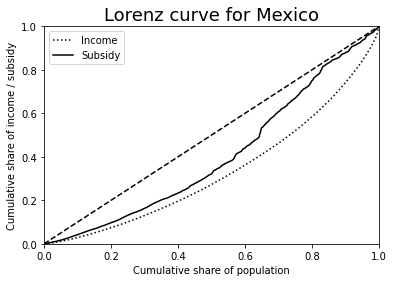

In [11]:
# Curva de Lorenz.

# Ordenamos por ingreso per cápita.
df.sort_values("PCI", inplace = True)

# Población acumulada - eje x de Lorenz.
df["Cum_Pop"] = (
    ( df["Poblacion"] ).cumsum()
    / ( df["Poblacion"] ).sum()
    )

# Ingreso acumulado - eje y de Lorenz.
df["Cum_PIB"] = ( df["PIB"].cumsum()
    / df["PIB"].sum() )
# Lorenz para subsidio.
df["Cum_Subs"] = ( df["Subsidio"].cumsum()
    / df["Subsidio"].sum() )

# Graficamos.
fig, ax = plt.subplots()
df.plot("Cum_Pop", "Cum_PIB", color = "k",
    linestyle = "dotted", ax = ax)
df.plot("Cum_Pop", "Cum_Subs", color = "k",
    linestyle = "solid", ax = ax)
ax.plot([0, 1], [0, 1], color = "k",
    linestyle = "dashed")

ax.set_title("Lorenz curve for Mexico",
    fontsize = 18)
ax.set_xlabel("Cumulative share of population")
ax.set_ylabel("Cumulative share of income / subsidy")
ax.legend(["Income", "Subsidy"])
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Coeficiente de Gini para ingreso.
B = np.trapz(df["Cum_PIB"], df["Cum_Pop"])
G = 2 * (0.5 - B)
print(f"Mexico's income Gini coefficient: {G:.2f}")

# Coeficiente de Gini para subsidio.
B = np.trapz(df["Cum_Subs"], df["Cum_Pop"])
G = 2 * (0.5 - B)
print(f"Mexico's electric subsidy Gini coefficient: {G:.2f}")

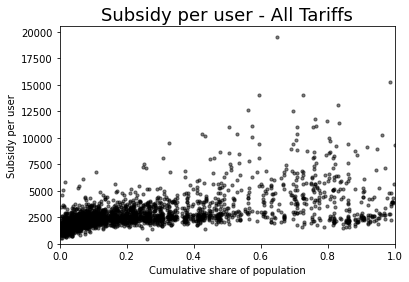

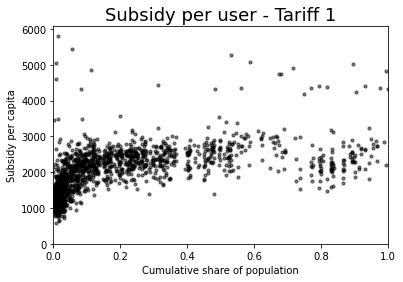

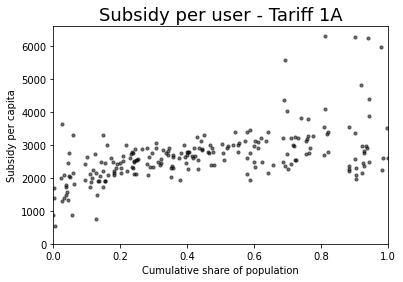

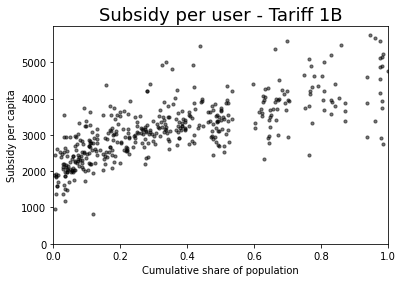

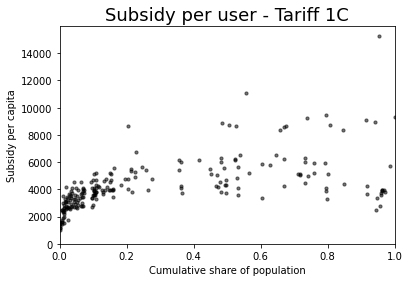

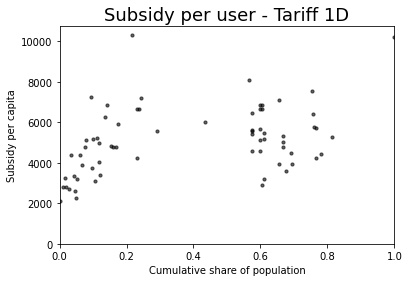

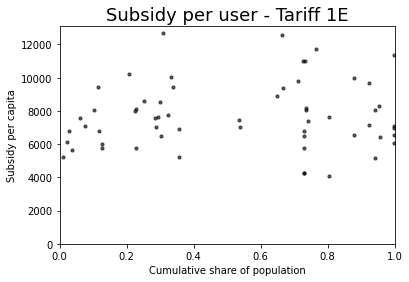

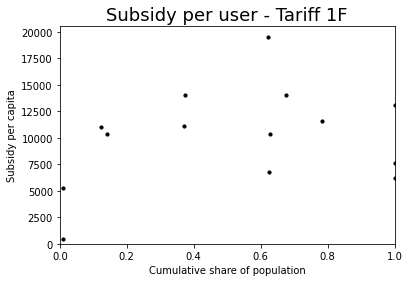

In [9]:
# Distribución del subsidio per cápita.

# Ordenamos por ingreso per cápita.
df.sort_values("PCI", inplace = True)

# Población acumulada - eje x.
df["Cum_Pop"] = (
    ( df["Poblacion"] ).cumsum()
    / ( df["Poblacion"] ).sum()
    )

# Graficamos la distribución para todas las tarifas.
fig, ax = plt.subplots()

ax.scatter(df["Cum_Pop"], df["Subsidio_Usuario"],
    color = "k", s = 10, alpha = 0.5)

ax.set_title("Subsidy per user - All Tariffs",
    fontsize = 18)
ax.set_xlabel("Cumulative share of population")
ax.set_ylabel("Subsidy per user")
ax.set_xlim(0, 1)
ax.set_ylim(0)


# Repetimos para cada la tarifa.
T = ["1", "1A", "1B", "1C",
    "1D", "1E", "1F"]

for t in T:
    # Seleccionamos los municipios
    # con la tarifa en cuestión.
    df_i = df[df["Tarifa"] == t].copy()

    # Cantidad de municipios.
    n = df_i.shape[0]

    # Ordenamos por ingreso per cápita.
    df_i["Cum_Pop"] = (
        ( df_i["Poblacion"] ).cumsum()
        / ( df_i["Poblacion"] ).sum()
        )

    # Graficamos.
    fig, ax = plt.subplots()
    ax.scatter(df_i["Cum_Pop"],
        df_i["Subsidio_Usuario"], color = "k",
        s = 10, alpha = 0.5 + 7 / n )

    ax.set_title("Subsidy per user - Tariff " + t,
        fontsize = 18)
    ax.set_xlabel("Cumulative share of population")
    ax.set_ylabel("Subsidy per capita")
    ax.set_xlim(0, 1)
    ax.set_ylim(0)